In [1]:
import os
import numpy as np
import tensorflow as tf
from keras.utils.image_utils import load_img, img_to_array
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import plotly.express as px

In [2]:
model = tf.keras.models.load_model('./model.h5')

In [3]:
path = './TEST/car.jpeg'

In [4]:
image = load_img(path)
image = np.array(image, dtype =np.uint8)
image1 = load_img(path, target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0
height, width, depth = image.shape
print('Height of the image =',height)
print('Width of the image =',width)

Height of the image = 960
Width of the image = 1280


In [5]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [6]:
# Make predictions
coords = model.predict(test_arr)
coords

1/1 [==============================] - 7s 7s/step


array([[0.40442884, 0.62511784, 0.54880035, 0.62063456]], dtype=float32)

In [7]:
# Denormalize the output values
denorm = np.array([width,width,height,height])
denorm

array([1280, 1280,  960,  960])

In [8]:
coords = coords * denorm
coords

array([[517.66891479, 800.15083313, 526.84833527, 595.80917358]])

In [9]:
coords = coords.astype(np.int32)
coords

array([[517, 800, 526, 595]])

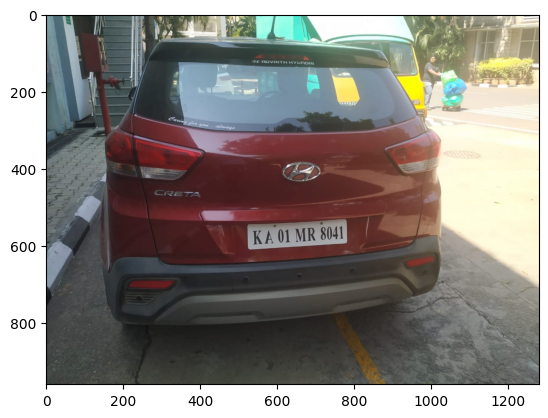

In [10]:
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.show()

In [11]:
import cv2

In [12]:
# Draw bounding on top the image
xmin, xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)

(517, 526) (800, 595)


Height of the image = 960
Width of the image = 1280


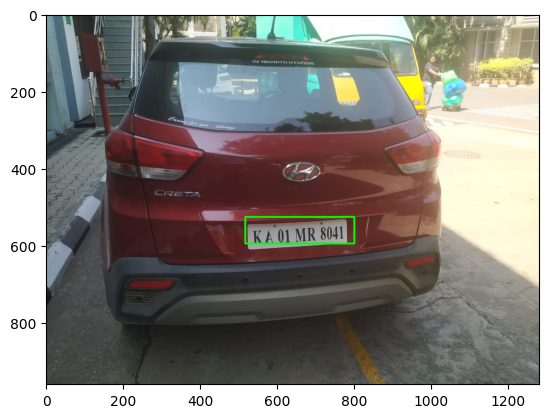

In [13]:
image = load_img(path)
image = np.array(image, dtype =np.uint8)
height, width, depth = image.shape
print('Height of the image =',height)
print('Width of the image =',width)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)
imgplot = plt.imshow(image)
plt.show()